# Big Data Derby 2022

Analyze horse racing data to improve the health of the horse and strategy of competition

ID's


track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.

race_date - date the race took place. YYYY-MM-DD.

race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.

program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.

trakus_index - The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds.

latitude - The latitude of the horse in the race passed as a float.

longitude - The longitude of the horse in the race passed as a float.

distance_id - Distance of the race in furlongs passed as an integer. Example - 600 would be 6 furlongs.

course_type - The course the race was run over passed as one character. M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf.

track_condition - The condition of the course the race was run on passed as three characters. YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft.

run_up_distance - Distance in feet of the gate to the start of the race passed as an integer.

race_type - The classification of the race passed as as five characters. STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.

purse - Purse in US dollars of the race passed as an money with two decimal places.

post_time - Time of day the race began passed as 5 character. Example - 01220 would be 12:20.

weight_carried - An integer of the weight carried by the horse in the race.

jockey - Name of the jockey on the horse in the race. 50 character max.

odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.


## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Reading data

In [2]:
nyra_2019 = pd.read_csv('data/nyra_2019_complete.csv', low_memory = False)
nyra_race = pd.read_csv('data/nyra_race_table.csv', low_memory = False)
nyra_start = pd.read_csv('data/nyra_start_table.csv', low_memory = False)
nyra_tracking = pd.read_csv('data/nyra_tracking_table.csv', low_memory = False)

In [3]:
nyra_2019.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


In [6]:
nyra_tracking.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762


In [4]:
nyra_race.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [5]:
nyra_start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds
0,AQU,2019-01-01,1,1,123,Dylan Davis,130
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150


In [7]:
nyra_2019.describe().style.background_gradient(cmap = "Purples")

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds
count,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000,5228430.000000
mean,5.505409,183.865213,41.203867,-73.777024,756.315127,67.919189,88878.907779,420.424807,120.713291,1482.919877
std,2.860656,118.332690,0.977123,0.047111,179.688689,38.922712,127824.025516,280.254500,4.351881,1952.415229
min,1.000000,1.000000,40.666711,-73.832601,450.000000,0.000000,16000.000000,100.000000,110.000000,0.000000
25%,3.000000,88.000000,40.673456,-73.828834,600.000000,45.000000,41000.000000,233.000000,118.000000,335.000000
50%,6.000000,176.000000,40.713934,-73.769148,800.000000,54.000000,62000.000000,349.000000,120.000000,730.000000
75%,8.000000,264.000000,40.717393,-73.725636,850.000000,80.000000,80000.000000,516.000000,122.000000,1740.000000
max,13.000000,1062.000000,43.073992,-73.714826,2000.000000,280.000000,1500000.000000,1259.000000,160.000000,19100.000000


In [8]:
nyra_tracking.track_id.value_counts()

AQU    2158369
BEL    1947134
SAR    1122927
Name: track_id, dtype: int64

In [9]:
nyra_tracking.race_number.value_counts()

8     582413
6     575217
5     559884
7     554623
4     523846
2     515115
1     508808
9     492915
3     490256
10    283141
11     98804
12     31725
13     11683
Name: race_number, dtype: int64

In [10]:
nyra_tracking.program_number.value_counts()

4      611396
3      611025
5      606666
2      602597
1      599979
6      579893
7      486905
8      373202
9      266526
10     186835
11     117532
12      71363
1A      56753
13      26507
14      15081
15       7917
2B       4081
16       3591
3X        334
1X        247
Name: program_number, dtype: int64

In [27]:
nyra_2019['race_date'] = pd.to_datetime(nyra_2019['race_date'])
nyra_2019['day'], nyra_2019['month'] = nyra_2019['race_date'].dt.day, nyra_2019['race_date'].dt.month


In [28]:
nyra_2019

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,day,month
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,167,40.672363,-73.830853,1100,T,GD,72,STK,200000,353,124,Joel Rosario,1120,23,11
5228426,AQU,2019-11-23,9,2,168,40.672321,-73.830873,1100,T,GD,72,STK,200000,353,124,Joel Rosario,1120,23,11
5228427,AQU,2019-11-23,9,2,169,40.672281,-73.830893,1100,T,GD,72,STK,200000,353,124,Joel Rosario,1120,23,11
5228428,AQU,2019-11-23,9,2,170,40.672240,-73.830913,1100,T,GD,72,STK,200000,353,124,Joel Rosario,1120,23,11


## Working with race data

In [167]:
class RaceAnalysis:
    
    def __init__(self, track, date, race_number):
        self.track = track
        self.date = date
        self.race_number = race_number

    def get_race_data(self):
        '''
        Get data of 1 race
        '''

        race_data = nyra_2019.loc[(nyra_tracking.track_id == self.track) 
                          & (nyra_tracking.race_date == self.date)
                          & (nyra_tracking.race_number == self.race_number)
                          ]
        return race_data

    def get_plot_race_way(self, race_data):
        '''
        Get plot
        '''
        plt.style.use("dark_background")
        plt.figure(figsize = (16, 8))
        sns.scatterplot(data = race_data, 
                        x = "longitude", 
                        y = "latitude", 
                        hue = "program_number", 
                        palette = "Paired"
                       )

        plt.title(f'Race date {date}\nRace number {race_number}')
        plt.legend()
        
    def get_animated_race(self, race_data):

        
        lat = race_data.latitude.sort_values()
        min_lat = lat.iloc[0]
        max_lat = lat.iloc[-1]

        long = race_data.longitude.sort_values()
        min_long = long.iloc[0]
        max_long = long.iloc[-1]

            
        fig = px.scatter(race_data.sort_values('trakus_index'), 
                   x="longitude", 
                   y="latitude", 
                   animation_frame="trakus_index", 
                   animation_group="program_number",
                   color = "program_number",
                   range_x = [min_long, max_long],
                   range_y = [min_lat, max_lat]
                  )
        fig.show()

In [168]:
track = 'AQU'
date = '2019-01-01'
race_number = 1

race_1 = RaceAnalysis(track, date, race_number)

race_1_data = race_1.get_race_data()

Track way

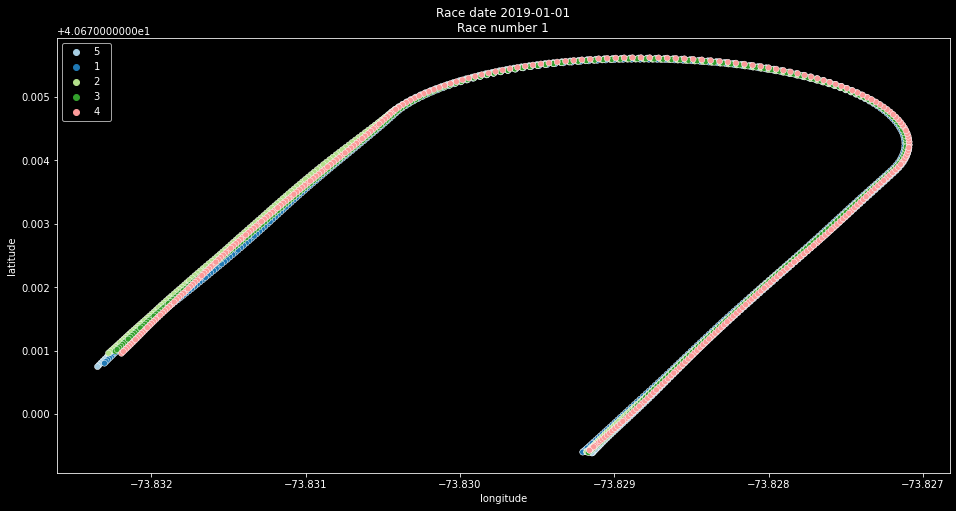

In [169]:
race_1.get_plot_race_way(race_1_data)

Racing visualization

In [170]:
race_1.get_animated_race(race_1_data)

# Coming soon...